In [29]:
import collect
from mnist_data import MnistData
from mnist_classifier import MnistClassifier
from collections import defaultdict


from cifar_data import Cifar10Data
from cifar_classifier import Cifar10Classifier

data_dispatch = {'mnist': MnistData, 'cifar10': Cifar10Data, 'cifar': Cifar10Data}
classifier_dispatch = {'mnist': MnistClassifier, 'cifar10': Cifar10Classifier, 'cifar': Cifar10Classifier}

## Load data 
#### (changable by dataset_name)

In [87]:
dataset_name = 'mnist'

DATASET_TYPE = data_dispatch[dataset_name]
CLASSIFIER_TYPE = classifier_dispatch[dataset_name]

features_data = DATASET_TYPE(use_features=True)
raw_data =DATASET_TYPE(use_features=False)

features, features_labels = features_data._features_and_labels()
images, raw_labels = raw_data._features_and_labels()

n_clusters = 30
data = collect.load_quadruplets(n_clusters, dataset_name=dataset_name)
quadruplets, cat_to_centroids, cat_to_vectors, original_shape = data

In [109]:
import numpy as np

from scipy.spatial.distance import cosine


def norm_measure(u, v):
    return np.linalg.norm(u - v)

# features, and centroids from same class
def get_map_centroid_index_to_features(features, centroids):
    map_centroid_to_features = defaultdict(list)
    
    for f in features:
        distances = [cosine(f, c) for c in centroids]
        closest_centroid_index = np.argmin(distances)
        map_centroid_to_features[closest_centroid_index].append((f, min(distances)))
    

    return map_centroid_to_features

def barplot_feature_centroids(ϕ, category, distance_measure=cosine):        
    centroids = cat_to_centroids[category]
    
    distances = np.array([1/distance_measure(ϕ, centroid) for centroid in centroids])
    return distances
#     argsort = np.argsort(distances)
#     return argsort, centroids


In [95]:
%matplotlib inline

import matplotlib.pyplot as plt

# plt.switch_backend('agg')

# plt.rcParams["figure.figsize"] = [20, 2]

def add_image_to_figure(vector, width=28, height=28):
    fig = plt.imshow(np.reshape(vector, (height, width)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)


def add_images_to_figure(vectors, titles=None, n_cols=4, width=28, height=28):
    n_rows = len(vectors) / n_cols if len(vectors) % n_cols == 0 else (len(vectors) / n_cols) + 1
#     for i, (vector, title) in enumerate(zip(vectors, titles)):
#         plt.subplot(n_rows, n_cols, i + 1)
#         plt.title(title)
#         add_image_to_figure(vector.astype(float), height, width)
    for i, vector in enumerate(vectors):
        plt.subplot(n_rows, n_cols, i + 1)
        add_image_to_figure(vector.astype(float), height, width)
    
    plt.tight_layout()
    
def feature_to_index(feature, features):
    for i, f in enumerate(features):
        if feature == f:
            return i
    
    return None

In [96]:
USE_FEATURES=  True
CLASS_REMOVED = 6

cls = CLASSIFIER_TYPE(use_features = USE_FEATURES, epochs = EPOCHS)
d = DATASET_TYPE(use_features=USE_FEATURES, class_removed=CLASS_REMOVED)
d.set_removed_class(CLASS_REMOVED)

features = d.get_n_samples(3000)
centroids = cat_to_centroids[CLASS_REMOVED]
print('num of samples - %d' % len(features))
print('num of centroids - %d' % len(centroids))

centroid_map = get_map_centroid_index_to_features(features, centroids)

Removed class # 6
current number of examples per class -- train:
 {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 7: 6265, 8: 5851, 9: 5949}

current number of examples per class -- test:
 {0: 878, 1: 1016, 2: 933, 3: 908, 4: 890, 5: 807, 7: 913, 8: 880, 9: 919}
num of samples - 3000
num of centroids - 30


In [119]:
####sanity!
print('centroid map size is %d ' % len(centroid_map.keys()))
#len(centroid_map[2])
for i in centroid_map.keys():
    print('%d - %d' % (i, len(centroid_map[i])))

print(sum([len(centroid_map[i]) for i in centroid_map.keys()]))

centroid map size is 14 
19 - 452
22 - 801
29 - 272
1 - 863
7 - 557
2 - 36
14 - 1
18 - 8
11 - 2
12 - 1
24 - 1
21 - 2
6 - 1
4 - 3


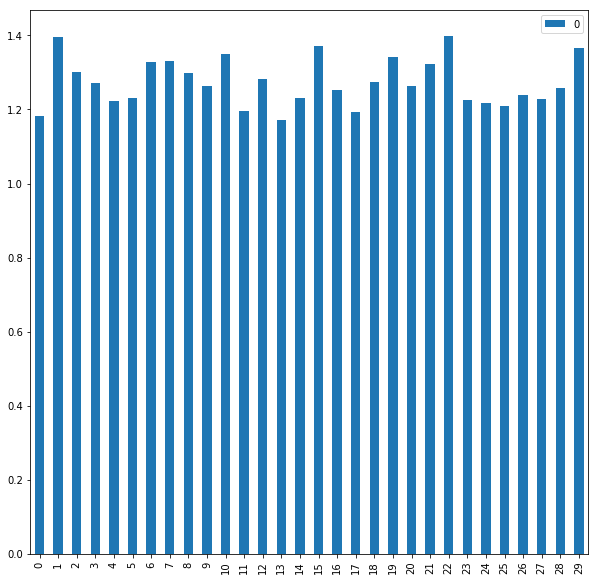

In [121]:
feature = centroid_map[22][8][0]
distances = barplot_feature_centroids(feature, CLASS_REMOVED)

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(distances)

df.plot(kind='bar', figsize=(10, 10))

plt.show()